# Load packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the dataset for this chunk (10/10).
Chunk 1 used for fine tuning.

In [2]:
df = pd.read_csv('C:/Users/rmcarri/OneDrive - Emory University/NHANES/Macronutrients LLMs/03.Results/Adolescents/FT 10epochs v2/df_val_with_answers_chunk10.csv')
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
0,0,119758,2,"ICE CREAM, VANILLA (177.19); CHEESE, CHEDDAR (...",3163,86.34,414.37,129.41,26.0,130.96,...,1,1.20,NaN,0.0,0.0,0.0,0.0,119758_NHANES_2017_March2020,3163; 86.34; 414.37; 129.41; 26.0; 130.96,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1,1,119763,2,"HAM, PREPACKAGED OR DELI, LUNCHEON MEAT (14); ...",1342,36.58,177.44,60.79,13.4,55.07,...,1,1.74,NaN,0.0,0.0,NaN,NaN,119763_NHANES_2017_March2020,1342; 36.58; 177.44; 60.79; 13.4; 55.07,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
2,2,119771,2,"MILK, WHOLE (91.5); MILK, WHOLE (106.75); ICE ...",1075,33.17,187.85,111.35,7.3,22.07,...,1,0.99,NaN,0.0,0.0,NaN,NaN,119771_NHANES_2017_March2020,1075; 33.17; 187.85; 111.35; 7.3; 22.07,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
3,3,119773,2,"MILK, WHOLE (122); CHICKEN FILLET SANDWICH, FR...",1877,65.59,213.91,53.80,8.8,83.49,...,5,5.00,NaN,0.0,0.0,0.0,0.0,119773_NHANES_2017_March2020,1877; 65.59; 213.91; 53.8; 8.8; 83.49,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
4,4,119776,2,"MILK SHAKE, FAST FOOD, FLAVORS OTHER THAN CHOC...",1911,79.09,212.71,63.71,12.7,83.80,...,4,2.72,NaN,0.0,0.0,0.0,0.0,119776_NHANES_2017_March2020,1911; 79.09; 212.71; 63.71; 12.7; 83.8,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,142187,2,"MILK, LOW FAT (1%) (122.01); CHOCOLATE MILK, L...",1247,31.84,183.79,92.88,9.5,46.42,...,1,1.85,NaN,0.0,0.0,NaN,NaN,142187_NHANES_August2021_August2023,1247; 31.84; 183.79; 92.88; 9.5; 46.42,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1124,1124,142189,2,"MILK, REDUCED FAT (2%) (488); CHEESE, PARMESAN...",2171,103.40,340.66,134.79,12.0,44.32,...,5,3.06,NaN,0.0,0.0,0.0,0.0,142189_NHANES_August2021_August2023,2171; 103.4; 340.66; 134.79; 12.0; 44.32,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1125,1125,142272,2,"CHICKEN NUGGETS, FROM FROZEN (32); HUMMUS, PLA...",1988,46.37,287.28,105.50,27.1,77.83,...,3,3.41,NaN,0.0,0.0,NaN,NaN,142272_NHANES_August2021_August2023,1988; 46.37; 287.28; 105.5; 27.1; 77.83,USER:\n\nPlease analyze the patient's dietary ...
1126,1126,142273,2,"ICE CREAM SANDWICH, VANILLA (150); TURKEY BACO...",3004,100.89,374.88,135.67,20.4,123.32,...,5,1.02,NaN,0.0,0.0,0.0,0.0,142273_NHANES_August2021_August2023,3004; 100.89; 374.88; 135.67; 20.4; 123.32,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...


# The output from the fine tuned model needs post-processing.
Post-process the output of the fine-tuned model.

Verify the new (post-processed) output is accurate.

Drop rows that cannot be post-processed (i.e., in a completely wrong format or did not yield the desired information).

In [3]:
# Post-process the LLM_Fine_Tuned content
def extract_numbers_after_response(text):
    response_section = text.split("### Response:")[-1].strip()   # Find everything after "### Response:"
    return "; ".join(response_section.split(";"))   # Extract the numbers and join them with semicolons

# Apply the function to your DataFrame column
df['LLM_Fine_Tuned'] = df['LLM_Fine_Tuned'].apply(extract_numbers_after_response)

In [4]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_Fine_Tuned'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}. I.e., these rows need post-processing.")
print(f"Consistent rows: {sum(mask)}. I.e., all rows are as expected, not need to post-process.")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1128
Inconsistent rows: 48. I.e., these rows need post-processing.
Consistent rows: 1080. I.e., all rows are as expected, not need to post-process.


,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
10,10,119820,2,"PIZZA, CHEESE, FROM FROZEN, THIN CRUST (51); O...",597,14.27,123.69,85.80,8.6,8.19,...,5,0.33,NaN,0.0,0.0,NaN,NaN,119820_NHANES_2017_March2020,597; 14.27; 123.69; 85.8; 8.6; 8.19,USER:\n\nPlease analyze the patient's dietary ...
20,20,119946,2,"CHEESE, AMERICAN (21); HAM, PREPACKAGED OR DEL...",979,17.53,157.72,97.58,4.1,31.99,...,2,5.00,NaN,0.0,0.0,0.0,NaN,119946_NHANES_2017_March2020,979; 17.53; 157.72; 97.58; 4.1; 31.99,USER:\n\nPlease analyze the patient's dietary ...
36,36,120035,2,"MILK, REDUCED FAT (2%) (183); MILK, REDUCED FA...",1331,47.65,183.44,84.31,8.7,46.82,...,3,5.00,NaN,0.0,0.0,0.0,NaN,120035_NHANES_2017_March2020,1331; 47.65; 183.44; 84.31; 8.7; 46.82,USER:\n\nPlease analyze the patient's dietary ...
44,44,120175,2,"MILK, REDUCED FAT (2%) (198.25); MILK, REDUCED...",2800,97.35,441.01,195.09,33.8,78.61,...,2,3.34,NaN,0.0,0.0,NaN,NaN,120175_NHANES_2017_March2020,2800; 97.35; 441.01; 195.09; 33.8; 78.61,USER:\n\nPlease analyze the patient's dietary ...
65,65,120437,2,"MILK, LOW FAT (1%) (488); PRETZELS, HARD, PLAI...",1558,63.70,236.80,70.55,10.6,40.65,...,5,4.17,NaN,0.0,0.0,NaN,NaN,120437_NHANES_2017_March2020,1558; 63.7; 236.8; 70.55; 10.6; 40.65,"INSTRUCTIONS:\n24-hour dietary recall: MILK, L..."
83,83,120649,2,"YOGURT, NONFAT MILK, FLAVORS OTHER THAN FRUIT ...",3012,116.18,414.08,160.71,23.9,102.21,...,4,0.59,NaN,0.0,0.0,NaN,NaN,120649_NHANES_2017_March2020,3012; 116.18; 414.08; 160.71; 23.9; 102.21,USER:\n\nPlease analyze the patient's dietary ...
107,107,120935,2,"MILK, WHOLE (538.86); CEREAL (KELLOGG'S FROSTE...",1374,39.46,231.26,114.69,6.2,36.04,...,4,1.24,NaN,0.0,0.0,NaN,NaN,120935_NHANES_2017_March2020,1374; 39.46; 231.26; 114.69; 6.2; 36.04,USER:\n\nPlease analyze the patient's dietary ...
119,119,121014,2,"CHEESE, AMERICAN (21); CHICKEN DRUMSTICK, FRIE...",1500,53.03,181.49,68.59,6.3,63.37,...,4,1.74,NaN,0.0,0.0,NaN,NaN,121014_NHANES_2017_March2020,1500; 53.03; 181.49; 68.59; 6.3; 63.37,USER:\n\nPlease analyze the patient's dietary ...
126,126,121119,2,"TURKEY BACON, COOKED (44); EGG OMELET OR SCRAM...",1456,43.18,183.76,58.96,6.6,60.90,...,4,2.43,NaN,0.0,1.0,0.0,NaN,121119_NHANES_2017_March2020,1456; 43.18; 183.76; 58.96; 6.6; 60.9,USER:\n\nPlease analyze the patient's dietary ...
127,127,121127,2,"CHOCOLATE MILK, READY TO DRINK, WHOLE (201.5);...",811,44.90,64.99,20.08,5.0,41.75,...,4,1.13,NaN,0.0,0.0,NaN,NaN,121127_NHANES_2017_March2020,811; 44.9; 64.99; 20.08; 5.0; 41.75,INSTRUCTIONS:\n24-hour dietary recall: CHOCOLA...


In [5]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1080, 23)

# Create the variables (columns) for the predicted energy and macronutrients.
From the fine-tuned model.

In [6]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_Fine_Tuned'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,smoker,id,Expected_Output,LLM_Fine_Tuned,DRxIKCAL_pred_ft,DRxIPROT_pred_ft,DRxICARB_pred_ft,DRxISUGR_pred_ft,DRxIFIBE_pred_ft,DRxITFAT_pred_ft
0,0,119758,2,"ICE CREAM, VANILLA (177.19); CHEESE, CHEDDAR (...",3163,86.34,414.37,129.41,26.0,130.96,...,0.0,119758_NHANES_2017_March2020,3163; 86.34; 414.37; 129.41; 26.0; 130.96,3031; 93.95; 356.8; 95.11; 19.3; 133.4,3031,93.95,356.80,95.11,19.3,133.40
1,1,119763,2,"HAM, PREPACKAGED OR DELI, LUNCHEON MEAT (14); ...",1342,36.58,177.44,60.79,13.4,55.07,...,NaN,119763_NHANES_2017_March2020,1342; 36.58; 177.44; 60.79; 13.4; 55.07,1546; 33.96; 250.1; 85.11; 13.3; 49.0,1546,33.96,250.10,85.11,13.3,49.00
2,2,119771,2,"MILK, WHOLE (91.5); MILK, WHOLE (106.75); ICE ...",1075,33.17,187.85,111.35,7.3,22.07,...,NaN,119771_NHANES_2017_March2020,1075; 33.17; 187.85; 111.35; 7.3; 22.07,1139; 37.95; 173.03; 107.17; 10.2; 36.41,1139,37.95,173.03,107.17,10.2,36.41
3,3,119773,2,"MILK, WHOLE (122); CHICKEN FILLET SANDWICH, FR...",1877,65.59,213.91,53.80,8.8,83.49,...,0.0,119773_NHANES_2017_March2020,1877; 65.59; 213.91; 53.8; 8.8; 83.49,2131; 73.81; 256.8; 59.03; 6.9; 86.9,2131,73.81,256.80,59.03,6.9,86.90
4,4,119776,2,"MILK SHAKE, FAST FOOD, FLAVORS OTHER THAN CHOC...",1911,79.09,212.71,63.71,12.7,83.80,...,0.0,119776_NHANES_2017_March2020,1911; 79.09; 212.71; 63.71; 12.7; 83.8,2138; 83.1; 238.8; 80.1; 9.9; 93.0,2138,83.10,238.80,80.10,9.9,93.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1122,142168,2,"FRUIT SMOOTHIE JUICE DRINK, WITH DAIRY (540); ...",2680,78.87,279.57,106.78,14.7,140.41,...,NaN,142168_NHANES_August2021_August2023,2680; 78.87; 279.57; 106.78; 14.7; 140.41,2691; 89.8; 328.1; 156.11; 11.2; 113.0,2691,89.80,328.10,156.11,11.2,113.00
1123,1123,142187,2,"MILK, LOW FAT (1%) (122.01); CHOCOLATE MILK, L...",1247,31.84,183.79,92.88,9.5,46.42,...,NaN,142187_NHANES_August2021_August2023,1247; 31.84; 183.79; 92.88; 9.5; 46.42,1381; 39.82; 200.1; 107.1; 10.0; 48.09,1381,39.82,200.10,107.10,10.0,48.09
1124,1124,142189,2,"MILK, REDUCED FAT (2%) (488); CHEESE, PARMESAN...",2171,103.40,340.66,134.79,12.0,44.32,...,0.0,142189_NHANES_August2021_August2023,2171; 103.4; 340.66; 134.79; 12.0; 44.32,2331; 95.56; 331.85; 109.03; 12.3; 64.84,2331,95.56,331.85,109.03,12.3,64.84
1126,1126,142273,2,"ICE CREAM SANDWICH, VANILLA (150); TURKEY BACO...",3004,100.89,374.88,135.67,20.4,123.32,...,0.0,142273_NHANES_August2021_August2023,3004; 100.89; 374.88; 135.67; 20.4; 123.32,2801; 99.1; 334.8; 139.09; 16.3; 120.2,2801,99.10,334.80,139.09,16.3,120.20


# Compute regression validation metrics.
Ground truth vs fine-tuned mode.

In [7]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable - Fine-tuned model:")
results_df.T


Metrics by Variable - Fine-tuned model:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,64043.4639,184.2213,0.1215,253.0681,0.9172
DRxIPROT,171.6311,9.3440,0.1752,13.1008,0.8760
DRxICARB,1610.9667,30.4238,0.1798,40.1368,0.8729
DRxISUGR,638.1627,17.0631,0.2751,25.2619,0.8230
DRxIFIBE,12.3242,2.4169,0.2139,3.5106,0.8032
DRxITFAT,301.6460,11.4828,0.1665,17.3680,0.8435


# Compute paired t-tests between the ground truth and the predictions.
Ground truth vs fine-tuned mode.

In [8]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples - Fine-tuned model:")
ttest_results.T


Calculate the t-test on TWO RELATED samples - Fine-tuned model:


,t_statistic,p_value
DRxIKCAL,-5.909473,4.600000e-09
DRxIPROT,-10.164670,0.000000e+00
DRxICARB,-16.002448,0.000000e+00
DRxISUGR,-6.787609,0.000000e+00
DRxIFIBE,6.423154,2.000000e-10
DRxITFAT,9.060293,0.000000e+00


# Create Bland-Atlman plots.
Ground truth vs fine-tuned mode.

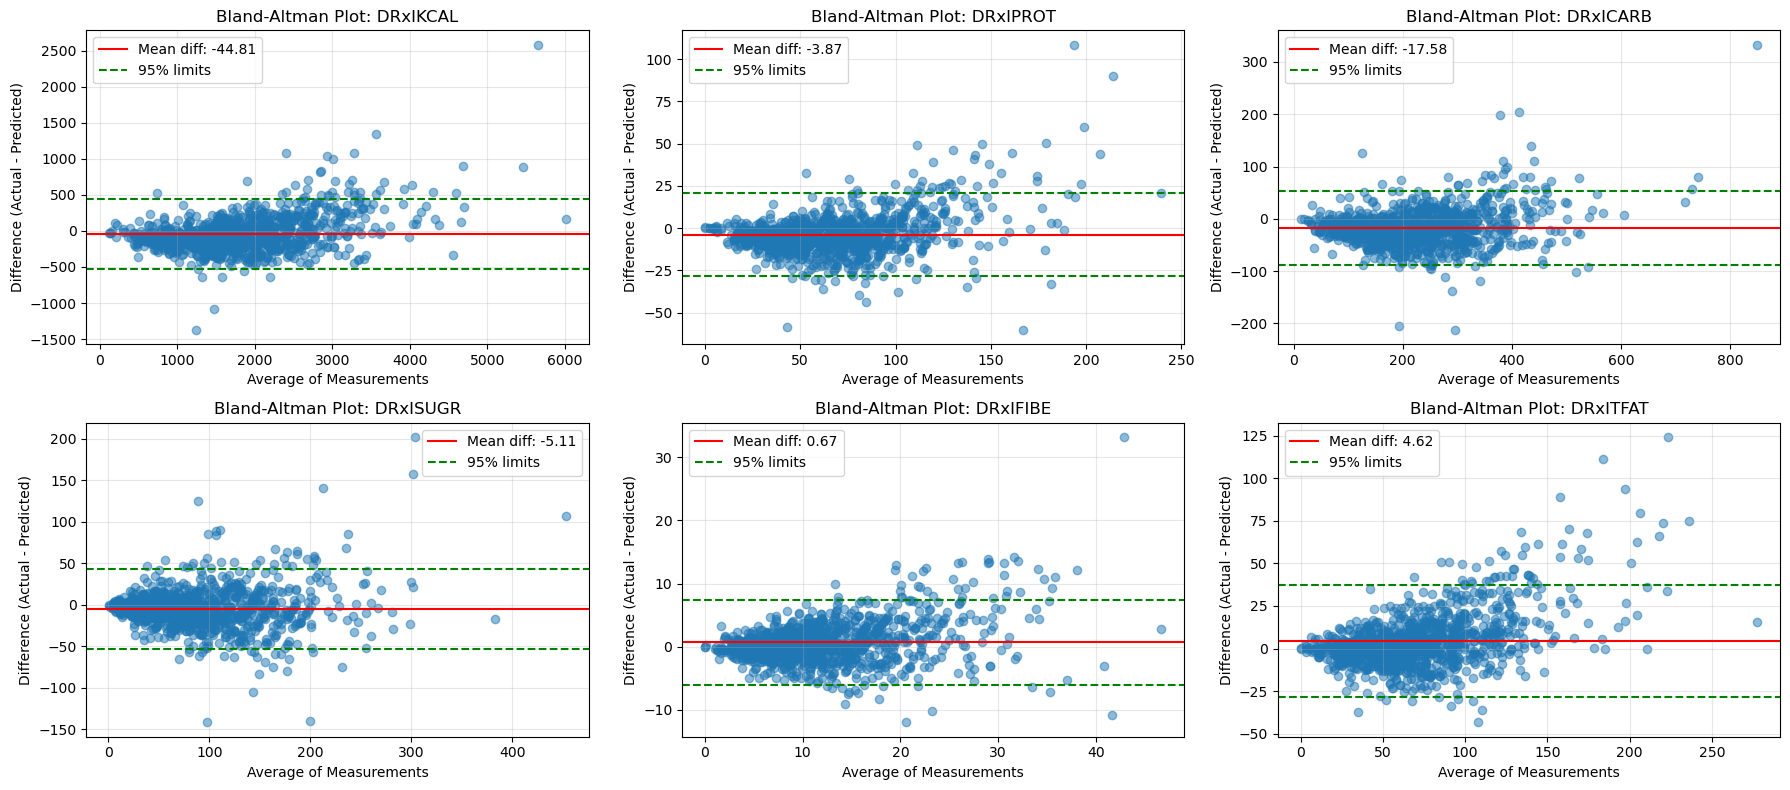

In [9]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()

# Create plots for Lin's CCC.
Ground truth vs fine-tuned mode.


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxIKCAL 0.943071
DRxIPROT 0.912185
DRxICARB 0.905664
DRxISUGR 0.901886
DRxITFAT 0.874247
DRxIFIBE 0.868567

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.9893


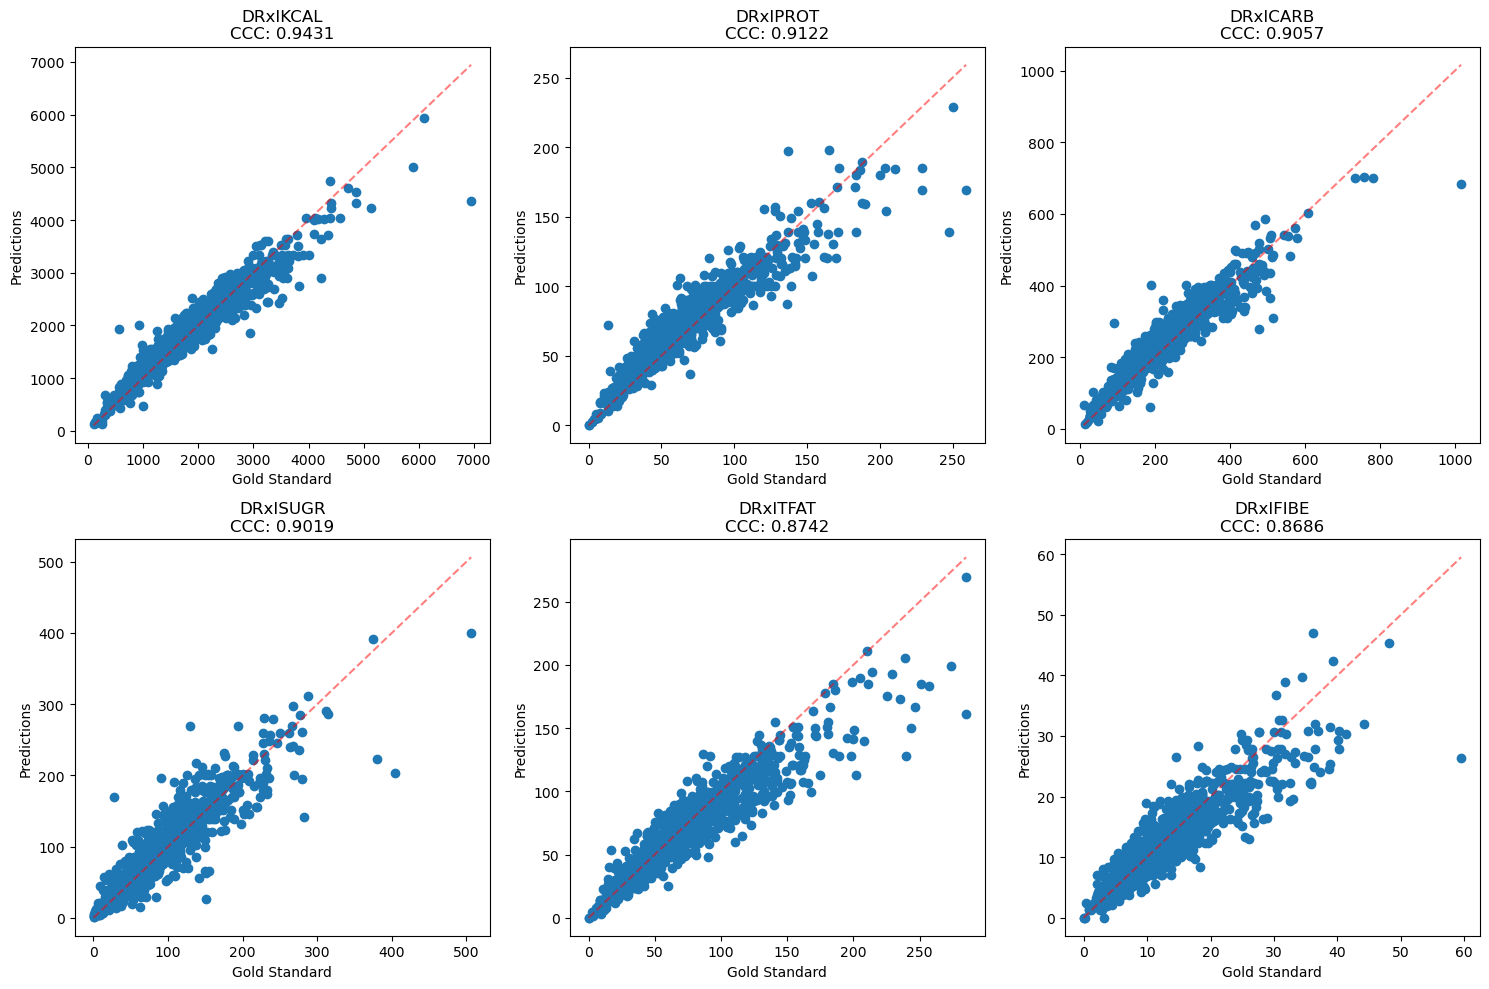

In [10]:
def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                  'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred_ft'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()